<a href="https://www.kaggle.com/code/aneevinay/bmw-sales-price-prediction?scriptVersionId=257271767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 💰 Introduction: Predicting Vehicle Prices (USD)

Accurate vehicle pricing is a key factor in customer decision-making and automotive market success. In this project, the primary objective is to predict the price of a vehicle (in USD) based on various features such as:

* Year of manufacture

* Engine size

* Mileage

* Region

* Vehicle model and brand

Using machine learning regression models—including Linear Regression, Random Forest, Support Vector Regressor, and more—we aim to:

* Understand the relationship between vehicle features and price,

* Evaluate the predictive performance of different regression algorithms,

* Identify the most significant features affecting vehicle prices.

This analysis not only helps in dynamic pricing strategies but also supports buyers and sellers in making well-informed decisions in the used car market.

# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
df= pd.read_csv('/kaggle/input/bmw-sales2010-2024/BMW sales data (2010-2024).csv')

# Check the Data

In [3]:
df.shape

(50000, 11)

## Glimpse the Data

In [4]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [5]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


The dataset contain values from year 2017 to 2024. Engine size varies from 1.5 to 5. Mileage starting from 3 km to nearly 200K. Price varies from 30K to 120K. Sales volumn changes from 100 to 9999.

## Checking missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


There is no missing values

# Data Exploration

## Explore numerical variables


 Year value_counts
Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
2015    3358
2014    3350
2012    3332
2010    3330
2013    3326
2017    3290
2011    3278
2018    3278
2023    3219
2020    3205
Name: count, dtype: int64


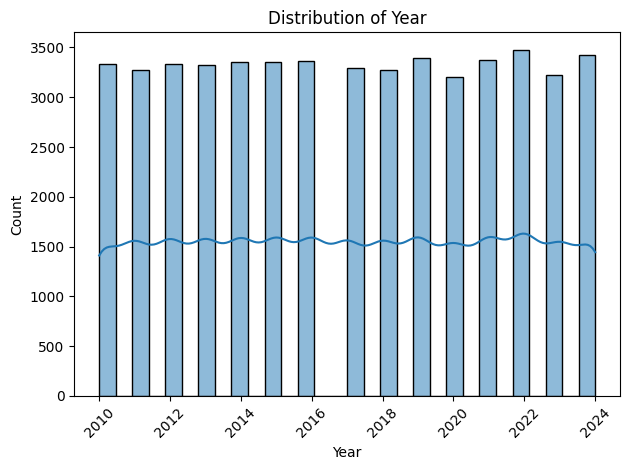


 Engine_Size_L value_counts
Engine_Size_L
3.8    1511
2.5    1486
4.5    1475
1.9    1471
2.6    1470
4.2    1468
4.4    1452
2.7    1452
3.5    1450
2.1    1448
4.7    1442
3.7    1437
2.3    1436
1.6    1432
3.1    1431
3.2    1426
3.9    1425
2.9    1425
4.3    1424
3.3    1423
1.8    1422
4.1    1421
3.0    1420
3.4    1419
4.0    1418
1.7    1418
2.0    1417
2.2    1406
4.6    1405
4.8    1391
2.4    1381
3.6    1381
2.8    1370
4.9    1314
5.0     723
1.5     710
Name: count, dtype: int64


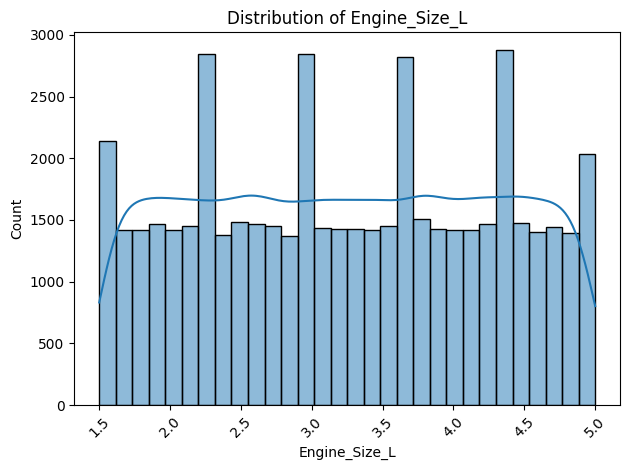


 Mileage_KM value_counts
Mileage_KM
136842    5
14750     4
45768     4
109154    4
111839    4
         ..
176928    1
162896    1
60465     1
111608    1
171003    1
Name: count, Length: 44347, dtype: int64


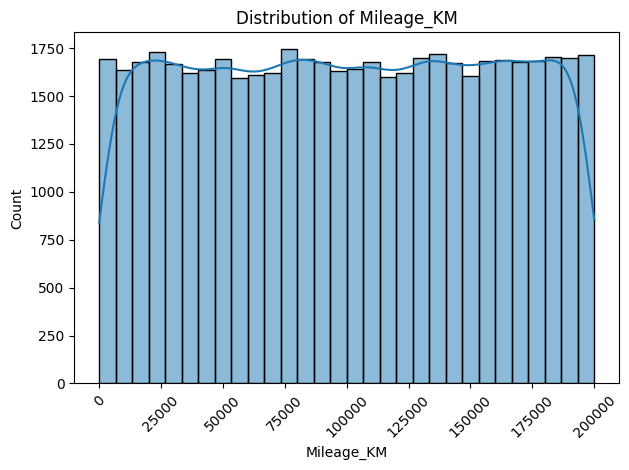


 Price_USD value_counts
Price_USD
30948    6
79587    5
51926    5
76399    5
42383    5
        ..
58630    1
77442    1
87262    1
45567    1
77492    1
Name: count, Length: 38246, dtype: int64


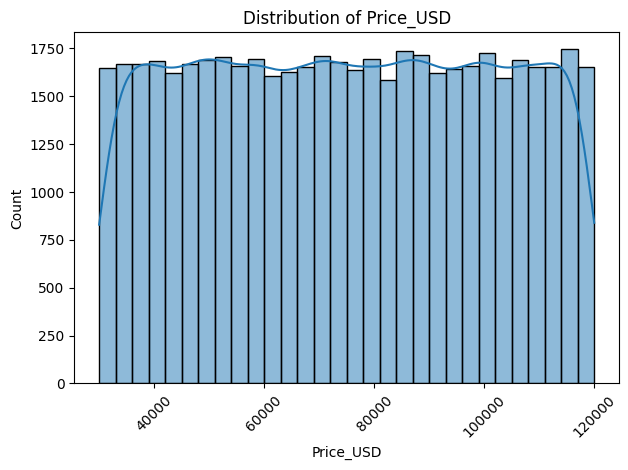


 Sales_Volume value_counts
Sales_Volume
9502    16
6867    14
6976    14
1474    14
9537    13
        ..
5408     1
424      1
3628     1
2684     1
4341     1
Name: count, Length: 9845, dtype: int64


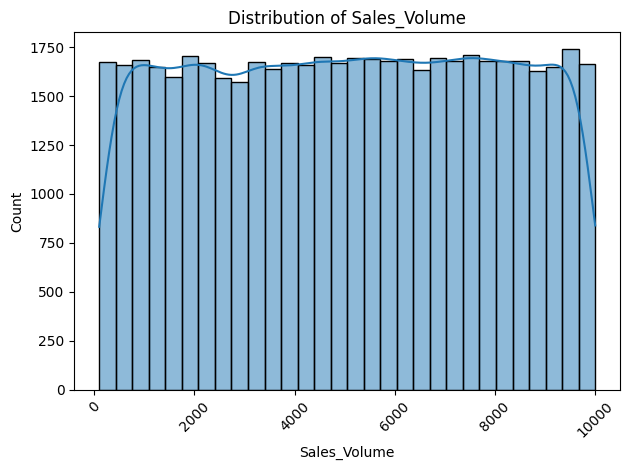

In [7]:
numerical_cols=df.select_dtypes(include='number').columns

for col in numerical_cols:
    print(f"\n {col} value_counts")
    print(df[col].value_counts())
    sns.histplot(x=col, data=df, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Correlation Heatmap

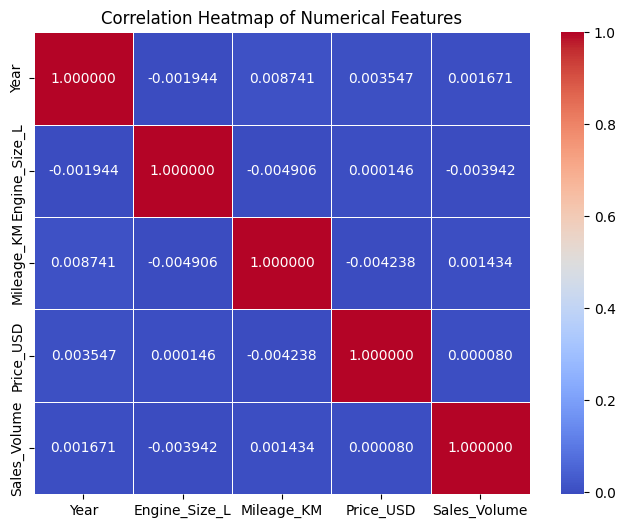

In [8]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

There is very weak correlation

## Explore categorical features


 Model value_counts
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


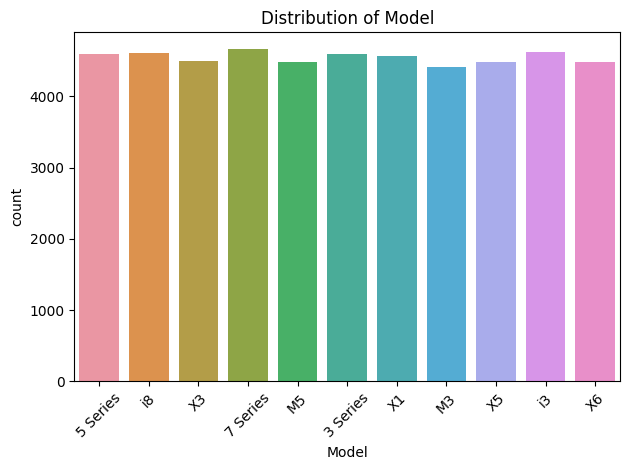


 Region value_counts
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64


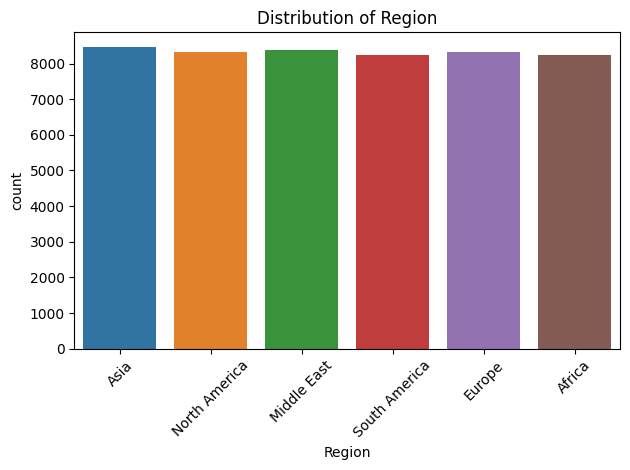


 Color value_counts
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64


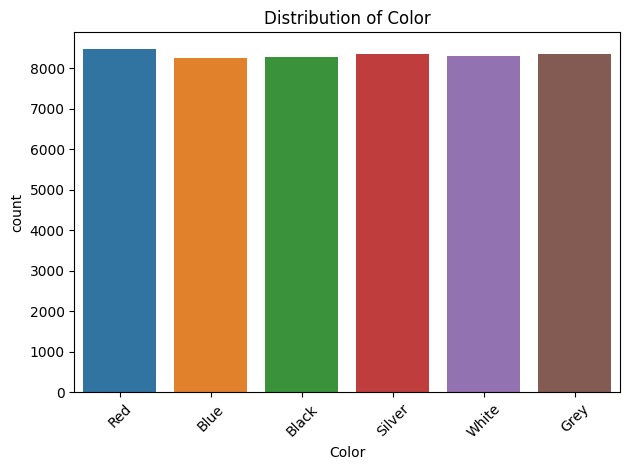


 Fuel_Type value_counts
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64


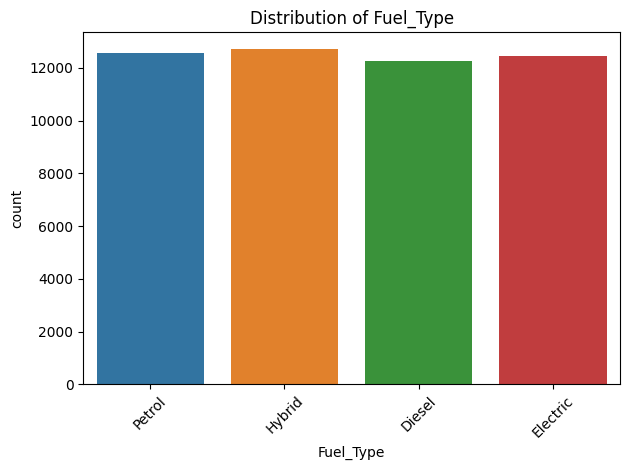


 Transmission value_counts
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64


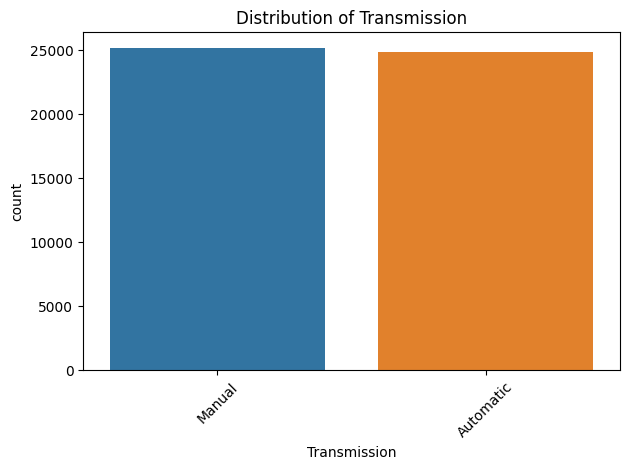


 Sales_Classification value_counts
Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


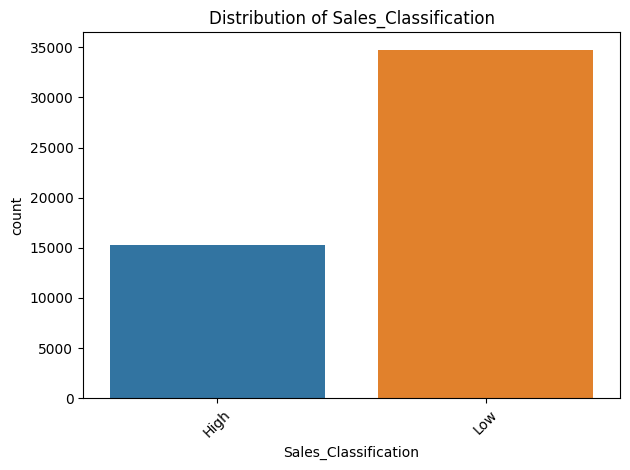

In [9]:
categorical_cols=df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n {col} value_counts")
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Categorical Encodding

In [10]:
df.nunique().sort_values()

Transmission                2
Sales_Classification        2
Fuel_Type                   4
Region                      6
Color                       6
Model                      11
Year                       15
Engine_Size_L              36
Sales_Volume             9845
Price_USD               38246
Mileage_KM              44347
dtype: int64

since cardinality is low, we can do OneHotEncoding

In [11]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df_numeric = df.drop(columns=categorical_cols)

df = pd.concat([df_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [12]:
df

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,...,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low
0,2016,3.5,151748,98740,8300,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2013,1.6,121671,79219,3428,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2022,4.5,10991,113265,6994,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2024,1.7,27255,60971,4047,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2020,2.1,122131,49898,3080,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2014,4.6,151030,42932,8182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
49996,2023,4.2,147396,48714,9816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
49997,2010,4.5,174939,46126,8280,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49998,2020,3.8,3379,58566,9486,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Predictive Models

## Define Predictors and Target values

In [13]:
X=df.drop(columns=['Price_USD'])
y=df['Price_USD']

## Split Data in Train,Test and validation set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Comparison

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R² = {r2:.4f}')

Linear Regression: MSE = 677756346.29, R² = -0.0012
Decision Tree: MSE = 1376686376.64, R² = -1.0338
Random Forest: MSE = 695432281.96, R² = -0.0274
Support Vector Regressor: MSE = 676912162.16, R² = 0.0000
K-Nearest Neighbors: MSE = 815189142.35, R² = -0.2043


**All R² scores are close to or below 0, meaning:**

**our models are not able to learn anything useful from the current features to predict Price_USD.**